In [1]:
#import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading and Preprocessing
#load the California Housing dataset using the fetch_california_housing function from sklearn
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [4]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
housing.target_names

['MedHouseVal']

In [7]:
#convert to DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
df['MedHouseVal'] = housing.target
df.head() #dataset loaded successfully

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df.shape

(20640, 9)

In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


All the features are float and there are no categorical feature

In [12]:
df.isnull().sum() #checking for missing values

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


No missing values found

In [13]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

No duplicates found

#Exploratory Data Analysis (EDA)

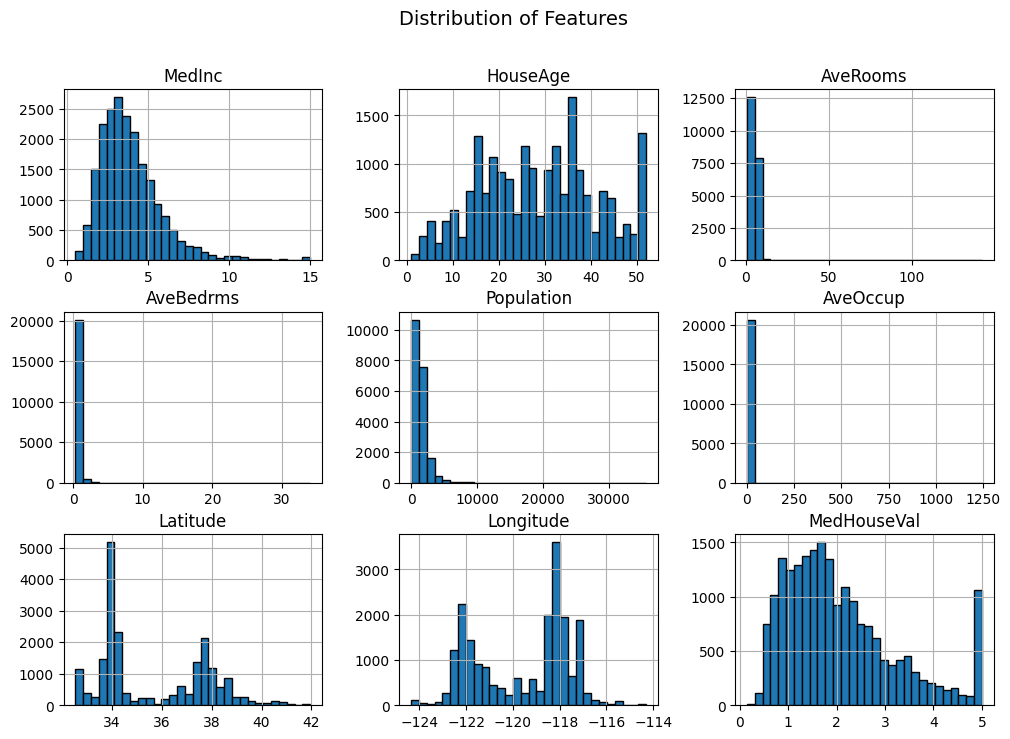

In [14]:
#individual feature distributions
df.hist(bins=30, edgecolor='black', figsize=(12, 8))
plt.suptitle("Distribution of Features", fontsize=14)
plt.show()

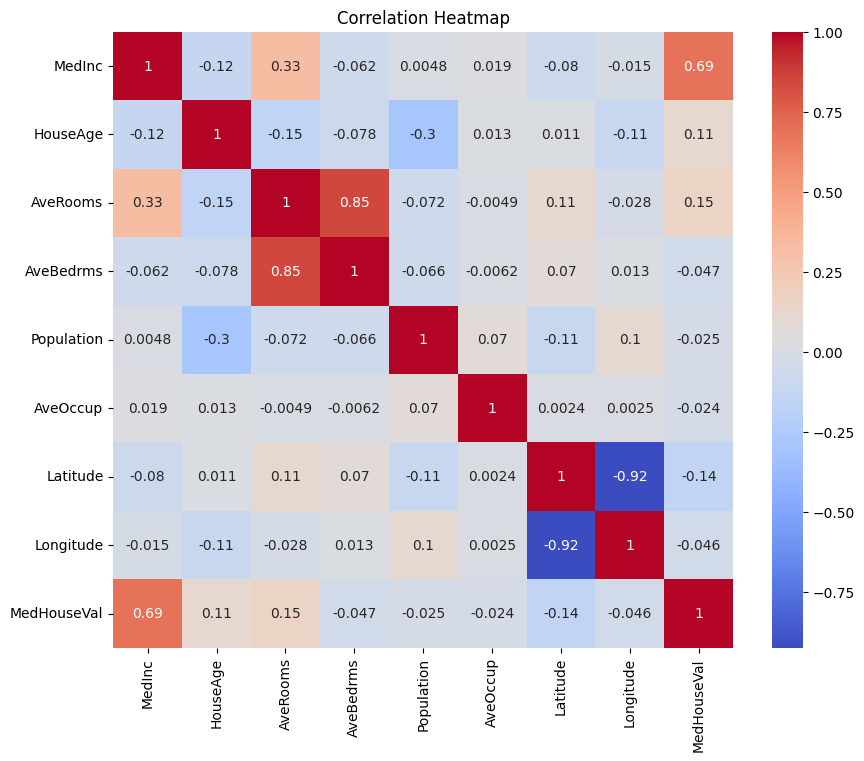

In [15]:
#Correlation Analysis
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Target(MedHouseVal) vs Features

MedInc (Median Income) has the strongest positive correlation (~0.69) with MedHouseVal.
→ Higher income areas tend to have higher median house values.

AveRooms and MedHouseVal have a weak–moderate positive correlation (~0.15).
→ More average rooms per household is slightly associated with higher house value.

HouseAge has a very weak positive correlation (~0.11) with MedHouseVal.
→ Older houses are slightly more expensive on average, but the relationship is weak.

Latitude has a small negative correlation (~-0.14) with MedHouseVal.
→ As latitude increases (moving north in California), house values slightly decrease.

Variables like Population, AveOccup, AveBedrms, Longitude have very low correlations (close to 0) with MedHouseVal, meaning they are not linearly related strongly to the target.

Relationships among predictors

AveRooms and AveBedrms have a very strong positive correlation (~0.85).
→ As the average number of rooms increases, average bedrooms also increase. These two features are highly redundant and may cause multicollinearity in linear models. You might consider dropping one or creating a combined feature.

Latitude and Longitude show a very strong negative correlation (~-0.92).
→ This reflects California’s geographic layout (as you move east–west, the north–south coordinate changes in a consistent pattern).

HouseAge and Population have a moderate negative correlation (~-0.30).
→ Older housing areas tend to have slightly lower population densities (or vice versa).

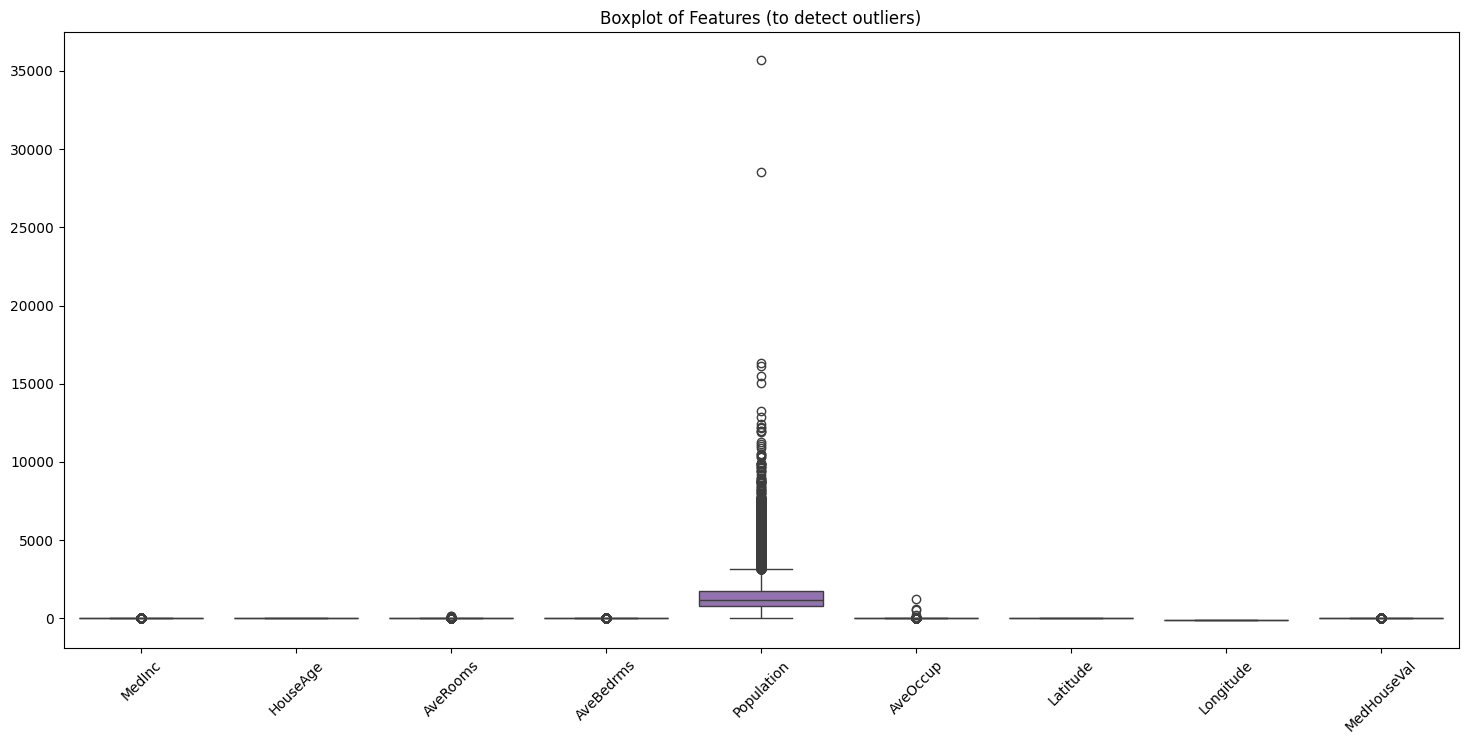

In [16]:
#Boxplots to check outliers
plt.figure(figsize=(18, 8))
sns.boxplot(data=df)
plt.title("Boxplot of Features (to detect outliers)")
plt.xticks(rotation=45)
plt.show()

In [17]:
#function to count outliers column-wise
outlier_summary = {}
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    outlier_summary[col] = outliers
#display outlier count
outlier_summary

{'MedInc': np.int64(681),
 'HouseAge': np.int64(0),
 'AveRooms': np.int64(511),
 'AveBedrms': np.int64(1424),
 'Population': np.int64(1196),
 'AveOccup': np.int64(711),
 'Latitude': np.int64(0),
 'Longitude': np.int64(0),
 'MedHouseVal': np.int64(1071)}

Outliers were detected for all numerical features using the IQR (Interquartile Range) method.
The features like AveBedrms, Population, MedHouseVal, AveOccup, MedInc, and AveRooms showed a relatively high number of outliers. HouseAge, Latitude, and Longitude did not exhibit outliers.

Since this is real-world housing data, these extreme values likely correspond to genuine cases such as very high-income regions, densely populated areas, or expensive houses rather than data errors.
Therefore, no rows were removed based on outliers. All observations were retained so that the model can learn from the full range of variation in the data.

In [18]:
#split features and targets.
X = df.drop('MedHouseVal', axis=1) #features (X)
y = df['MedHouseVal'] #target (y)

In [19]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [21]:
#define models (scaling is done only for Linear Regression and SVR)
models = {
    "Linear Regression": Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())]),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": Pipeline([('scaler', StandardScaler()), ('svr', SVR())])
}

In [22]:
#to store results
results = []

#train, predict and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mae, mse, rmse, r2])

#create results dataframe
results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2"])
results_df = results_df.sort_values(by="R2", ascending=False).reset_index(drop=True)
print(results_df)

               Model       MAE       MSE      RMSE        R2
0      Random Forest  0.327543  0.255368  0.505340  0.805123
1  Gradient Boosting  0.371643  0.293997  0.542215  0.775645
2                SVR  0.398599  0.357004  0.597498  0.727563
3      Decision Tree  0.454679  0.495235  0.703729  0.622076
4  Linear Regression  0.533200  0.555892  0.745581  0.575788


○ Linear Regression: Models the relationship between the target variable y and input features X as a straight line (a linear combination). It tries to find the best-fitting line that minimizes the sum of squared errors between predicted and actual values. California Housing dataset contains non-linear relationships (e.g., prices may rise quickly with income up to a point, then level off). Hence, Linear Regression gives reasonable but not top performance (R² ≈ 0.58).

○ Decision Tree Regressor: Splits the data recursively into smaller regions based on feature thresholds that reduce prediction error the most. Each terminal node (leaf) represents the predicted target value for samples in that region. Captures non-linear relationships and feature interactions automatically. Handles both large and small scales of data easily (no need for scaling). In this dataset, it performs better than Linear Regression, but it can overfit if not tuned (R² ≈ 0.62).

○ Random Forest Regressor: An ensemble of many Decision Trees trained on random subsets of data and features. The final prediction is the average of all trees’ predictions, reducing overfitting and variance. Works exceptionally well for tabular, mixed-scale, and non-linear data like this dataset. It captures complex relationships between features such as MedInc, AveRooms, and Population. Achieves highest accuracy (R² ≈ 0.81) because it generalizes well while maintaining low variance.

○ Gradient Boosting Regressor: Builds an ensemble sequentially, where each new tree tries to correct the errors of the previous one. Combines weak learners (shallow trees) into a strong predictive model through gradient-based optimization. Excellent for non-linear and complex datasets like California Housing. Learns patterns iteratively and fine-tunes predictions. Performs slightly below Random Forest here (R² ≈ 0.78), but with proper tuning (learning rate, n_estimators), it can even surpass it.

○ Support Vector Regressor (SVR): Uses the concept of maximum margin from Support Vector Machines. Can use kernels (like RBF) to capture non-linear relationships. Needs feature scaling and can be slow for large datasets like California Housing (~20,000 rows). Performs decently (R² ≈ 0.73), showing it captures non-linearity but not as efficiently as ensemble trees.

Models Evaluation and Comparison:

Random Forest performs the best.
*Lowest errors (MAE, MSE, RMSE).
*Highest R² (0.805) → explains ~80% of variance.
*Benefits from ensembling multiple trees → reduces overfitting compared to a single Decision Tree.

Gradient Boosting is the second-best model.

SVR performs decently but worse than ensemble trees.

Decision Tree has lower performance than ensemble models.

Linear Regression:
*Lowest performance.
*Cannot capture non-linear relationships in the data.
*Simple, interpretable model, but less predictive power here.

In [23]:
#1. Random Forest – GridSearchCV
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best params (RF):", grid_rf.best_params_)
print("Best CV RMSE (RF):", (-grid_rf.best_score_)**0.5)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

Best params (RF): {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best CV RMSE (RF): 0.5100952218853242


In [24]:
#2. Gradient Boosting – GridSearchCV
gb = GradientBoostingRegressor(random_state=42)

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'subsample': [0.8, 1.0]
}

grid_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_gb,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_gb.fit(X_train, y_train)

print("Best params (GB):", grid_gb.best_params_)
print("Best CV RMSE (GB):", (-grid_gb.best_score_)**0.5)

best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

Best params (GB): {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Best CV RMSE (GB): 0.4879195051929761


In [25]:
#3. SVR – need scaling + GridSearchCV
svr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

param_grid_svr = {
    'svr__C': [1, 10, 100],
    'svr__gamma': ['scale', 0.01, 0.001],
    'svr__kernel': ['rbf']
}

grid_svr = GridSearchCV(
    estimator=svr_pipe,
    param_grid=param_grid_svr,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_svr.fit(X_train, y_train)

print("Best params (SVR):", grid_svr.best_params_)
print("Best CV RMSE (SVR):", (-grid_svr.best_score_)**0.5)

best_svr = grid_svr.best_estimator_
y_pred_svr = best_svr.predict(X_test)

Best params (SVR): {'svr__C': 10, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
Best CV RMSE (SVR): 0.5661360568556142


In [26]:
#4. Decision Tree – GridSearchCV
dt = DecisionTreeRegressor(random_state=42)

param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)

print("Best params (DT):", grid_dt.best_params_)
print("Best CV RMSE (DT):", (-grid_dt.best_score_)**0.5)

best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

Best params (DT): {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV RMSE (DT): 0.6223523036685098


In [27]:
#5. Linear Regression: Scaling + GridSearchCV
#For basic LinearRegression, there are not many hyperparameters. To show tuning, using Ridge (regularization strength alpha)
from sklearn.linear_model import Ridge

ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

param_grid_ridge = {
    'ridge__alpha': [0.01, 0.1, 1.0, 10.0]
}

grid_ridge = GridSearchCV(
    estimator=ridge_pipe,
    param_grid=param_grid_ridge,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_ridge.fit(X_train, y_train)

print("Best params (Ridge):", grid_ridge.best_params_)
print("Best CV RMSE (Ridge):", (-grid_ridge.best_score_)**0.5)

best_ridge = grid_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)


Best params (Ridge): {'ridge__alpha': 0.01}
Best CV RMSE (Ridge): 0.720600586020812


In [28]:
#After tuning – evaluate on test set
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(name)
    print("  MAE :", mae)
    print("  MSE :", mse)
    print("  RMSE:", rmse)
    print("  R²  :", r2)
    print("-"*40)

evaluate_model("Random Forest (tuned)", best_rf, X_test, y_test)
evaluate_model("Gradient Boosting (tuned)", best_gb, X_test, y_test)
evaluate_model("SVR (tuned)", best_svr, X_test, y_test)
evaluate_model("Decision Tree (tuned)", best_dt, X_test, y_test)
evaluate_model("Ridge (tuned)", best_ridge, X_test, y_test)

Random Forest (tuned)
  MAE : 0.3259970447262191
  MSE : 0.2540345930813259
  RMSE: 0.504018445179664
  R²  : 0.8061409855247303
----------------------------------------
Gradient Boosting (tuned)
  MAE : 0.3260450919130299
  MSE : 0.23665482728046866
  RMSE: 0.4864718155047306
  R²  : 0.8194038416936402
----------------------------------------
SVR (tuned)
  MAE : 0.37744526282679725
  MSE : 0.3236971725892548
  RMSE: 0.568943909879748
  R²  : 0.7529800406100791
----------------------------------------
Decision Tree (tuned)
  MAE : 0.4311152226926481
  MSE : 0.40840458615620523
  RMSE: 0.6390654005312799
  R²  : 0.6883380738855668
----------------------------------------
Ridge (tuned)
  MAE : 0.5332000589081536
  MSE : 0.5558912301037884
  RMSE: 0.7455811358288167
  R²  : 0.5757879873121597
----------------------------------------


Hyperparameter Tuning and Final Model Comparison

Hyperparameter tuning was performed using GridSearchCV with 5-fold cross-validation for all models (Random Forest, Gradient Boosting, SVR, Decision Tree, and Ridge Regression). The best hyperparameters were selected based on the lowest cross-validated RMSE and the corresponding tuned models were then evaluated on the test set.

After tuning, Gradient Boosting achieved the best overall performance, with a test RMSE of 0.4865 and an R² score of 0.8194, improving substantially over its baseline version (RMSE 0.5422, R² 0.7756). The tuned Random Forest model also performed strongly (RMSE 0.5040, R² 0.8061), but slightly worse than Gradient Boosting.

SVR and Decision Tree showed moderate performance after tuning (RMSE ≈ 0.569 and 0.639, respectively), while Ridge Regression obtained the weakest results (RMSE 0.7456, R² 0.5758), indicating that simple linear models are not sufficient to capture the non-linear relationships present in the California Housing data.

Based on these results, the tuned Gradient Boosting model was selected as the final model for this project.
It outperforms the others because its bias–variance tradeoff and the way it learns patterns happen to match this dataset really well.